In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [35]:
data = np.load('tiny.npz')

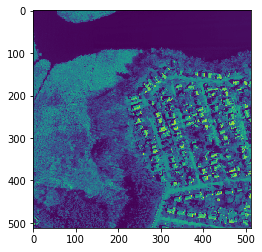

In [36]:
image = data['inp'][0, :, :, :].sum(axis = 2)
plt.imshow(image)

In [37]:
def slide_template(X, wsize):
    newX = []
    for col in range(X.shape[1] - wsize - 1):
        for row in range(X.shape[0] - wsize - 1):
            window = []
            for k in range(wsize):
                for l in range(wsize):
                    window.append(X[row + k, col + l])
            newX.append(window)
    newX = np.asarray(newX)
    return newX

X = slide_template(image, 5)
print(X.shape)

(256036, 25)


In [38]:
def performPCA(X):
    pca = PCA(n_components = 3)
    scores = pca.fit_transform(X)
    return scores, pca.explained_variance_ratio_

scores, explained = performPCA(X)
print(scores.shape)

(256036, 3)


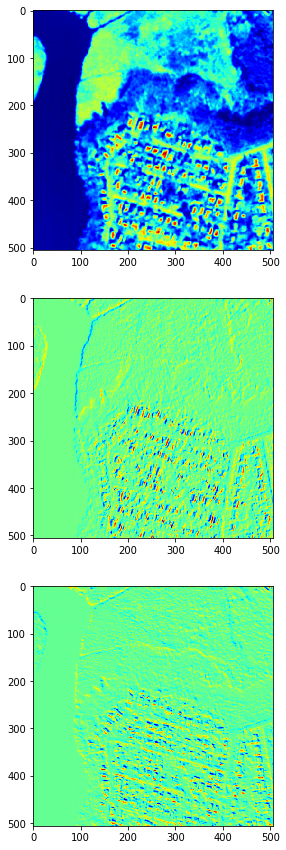

In [39]:
fig = plt.figure(figsize=(15, 15))
for i in range(3):
    fig.add_subplot(3, 1, 1 + i)
    size = int(np.sqrt(scores[:,0].size))
    grid = scores[:,i].reshape((size, size))
    plt.imshow(grid, cmap='jet')



(array([1.03000e+02, 7.92000e+02, 3.51200e+03, 1.43170e+04, 1.62033e+05,
        6.33980e+04, 8.99600e+03, 2.17900e+03, 6.30000e+02, 7.60000e+01]),
 array([-1196.64018273,  -949.75381835,  -702.86745397,  -455.98108959,
         -209.0947252 ,    37.79163918,   284.67800356,   531.56436795,
          778.45073233,  1025.33709671,  1272.22346109]),
 <a list of 10 Patch objects>)

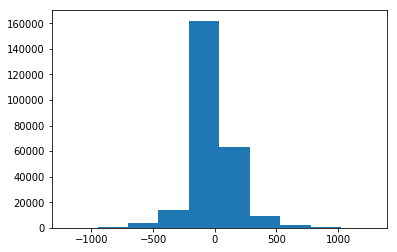

In [41]:
plt.hist(scores[:,1].flatten())